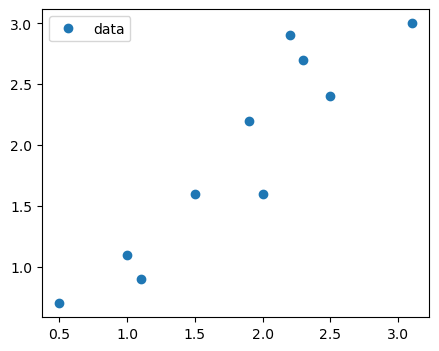

In [ ]:
# PCA 실습
import numpy as np
import matplotlib.pyplot as plt

data = [[2.5, 2.4],
        [0.5, 0.7],
        [2.2, 2.9],
        [1.9, 2.2],
        [3.1, 3.0],
        [2.3, 2.7],
        [2, 1.6],
        [1, 1.1],
        [1.5, 1.6],
        [1.1, 0.9]]

data_np = np.array(data)

plt.figure(figsize = (5, 4))
plt.plot(data_np[:, 0], data_np[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

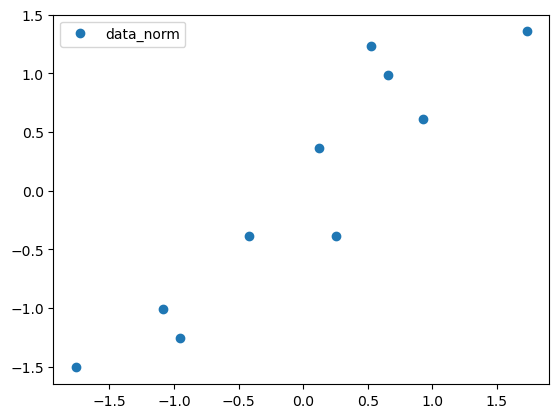

In [ ]:
# 표준화

data_mean = np.mean(data_np, axis = 0)
data_std = np.std(data_np, axis = 0)
data_norm = (data - data_mean) / data_std

plt.plot(data_norm[:, 0], data_norm[:, 1], 'o', label = 'data_norm')
plt.legend()
plt.show()

In [23]:
# 공분산 행렬 구하기
d_cov = np.cov(data_norm.T)
d_cov

array([[1.11111111, 1.0288103 ],
       [1.0288103 , 1.11111111]])

In [24]:
# 고유값, 고유벡터 구하기
eigvalues, eigvectors = np.linalg.eig(d_cov)
print(f"eigvalues : {eigvalues}")
print(f"ratio : {eigvalues / np.sum(eigvalues)}")
print(f"eigvectors : \n{eigvectors}")

eigvalues : [0.08230081 2.13992141]
ratio : [0.03703536 0.96296464]
eigvectors : 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


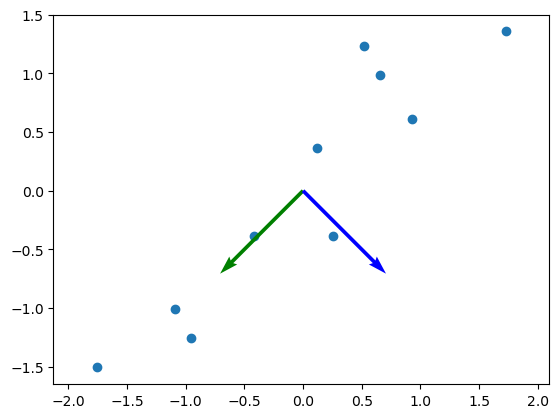

In [31]:
plt.scatter(data_norm[:, 0], data_norm[:, 1])
plt.quiver((0, 0), (0, 0), eigvectors[:, 0], eigvectors[:, 1], color = ['g', 'b'], units = 'xy', scale = 1)
plt.axis('equal')
plt.show()

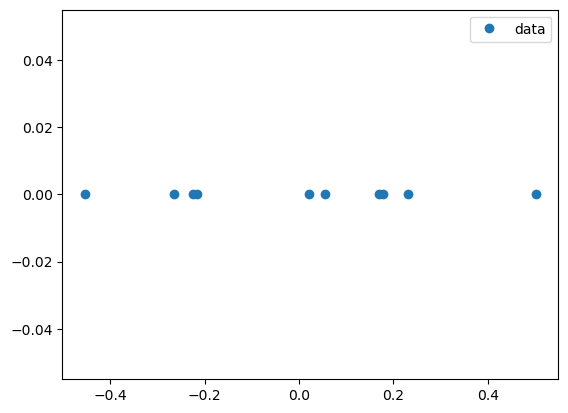

In [19]:
# 첫 번째 PC 선택
F = eigvectors[:, 0]

# 내적 계산
data_new = np.dot(data_norm, F)

# 시각화
plt.plot(data_new, np.zeros(10), 'o', label = 'data')
plt.legend()
plt.show()

In [21]:
data_new

array([-0.22352364,  0.17808082,  0.501509  ,  0.16991864, -0.26475825,
        0.23048082, -0.45331721,  0.05566672,  0.02130455, -0.21536146])

In [27]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 1)
res = pca_model.fit_transform(data_norm)
print(res)

[[ 1.08643242]
 [-2.3089372 ]
 [ 1.24191895]
 [ 0.34078247]
 [ 2.18429003]
 [ 1.16073946]
 [-0.09260467]
 [-1.48210777]
 [-0.56722643]
 [-1.56328726]]


# Iris 데이터 과제 - PCA 구현 실습